In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("drug200.csv", delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df["Drug"].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [5]:
df.shape

(200, 6)

In [6]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df['Drug'].values
X[:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
le_s = LabelEncoder()
le_s.fit(['F','M'])
X[:,1] = le_s.transform(X[:,1])
X[:,1]

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0], dtype=object)

In [8]:
le_b = LabelEncoder()
le_b.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_b.transform(X[:,2])
X[:,2]

array([0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2,
       1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2,
       0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1,
       1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0,
       0, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2,
       2, 1], dtype=object)

In [9]:
le_c = LabelEncoder()
le_c.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_c.transform(X[:,3]) 
X[:,3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1], dtype=object)

In [10]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [11]:
X[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)
print(x_train.shape)
print(x_test.shape)

(150, 5)
(50, 5)


In [13]:
dtc = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
y_pred

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY'], dtype=object)

In [14]:
y_test

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugX'], dtype=object)

In [15]:
from sklearn.metrics import accuracy_score
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_pred) * 100)

DecisionTrees's Accuracy:  98.0


In [16]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline 

C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


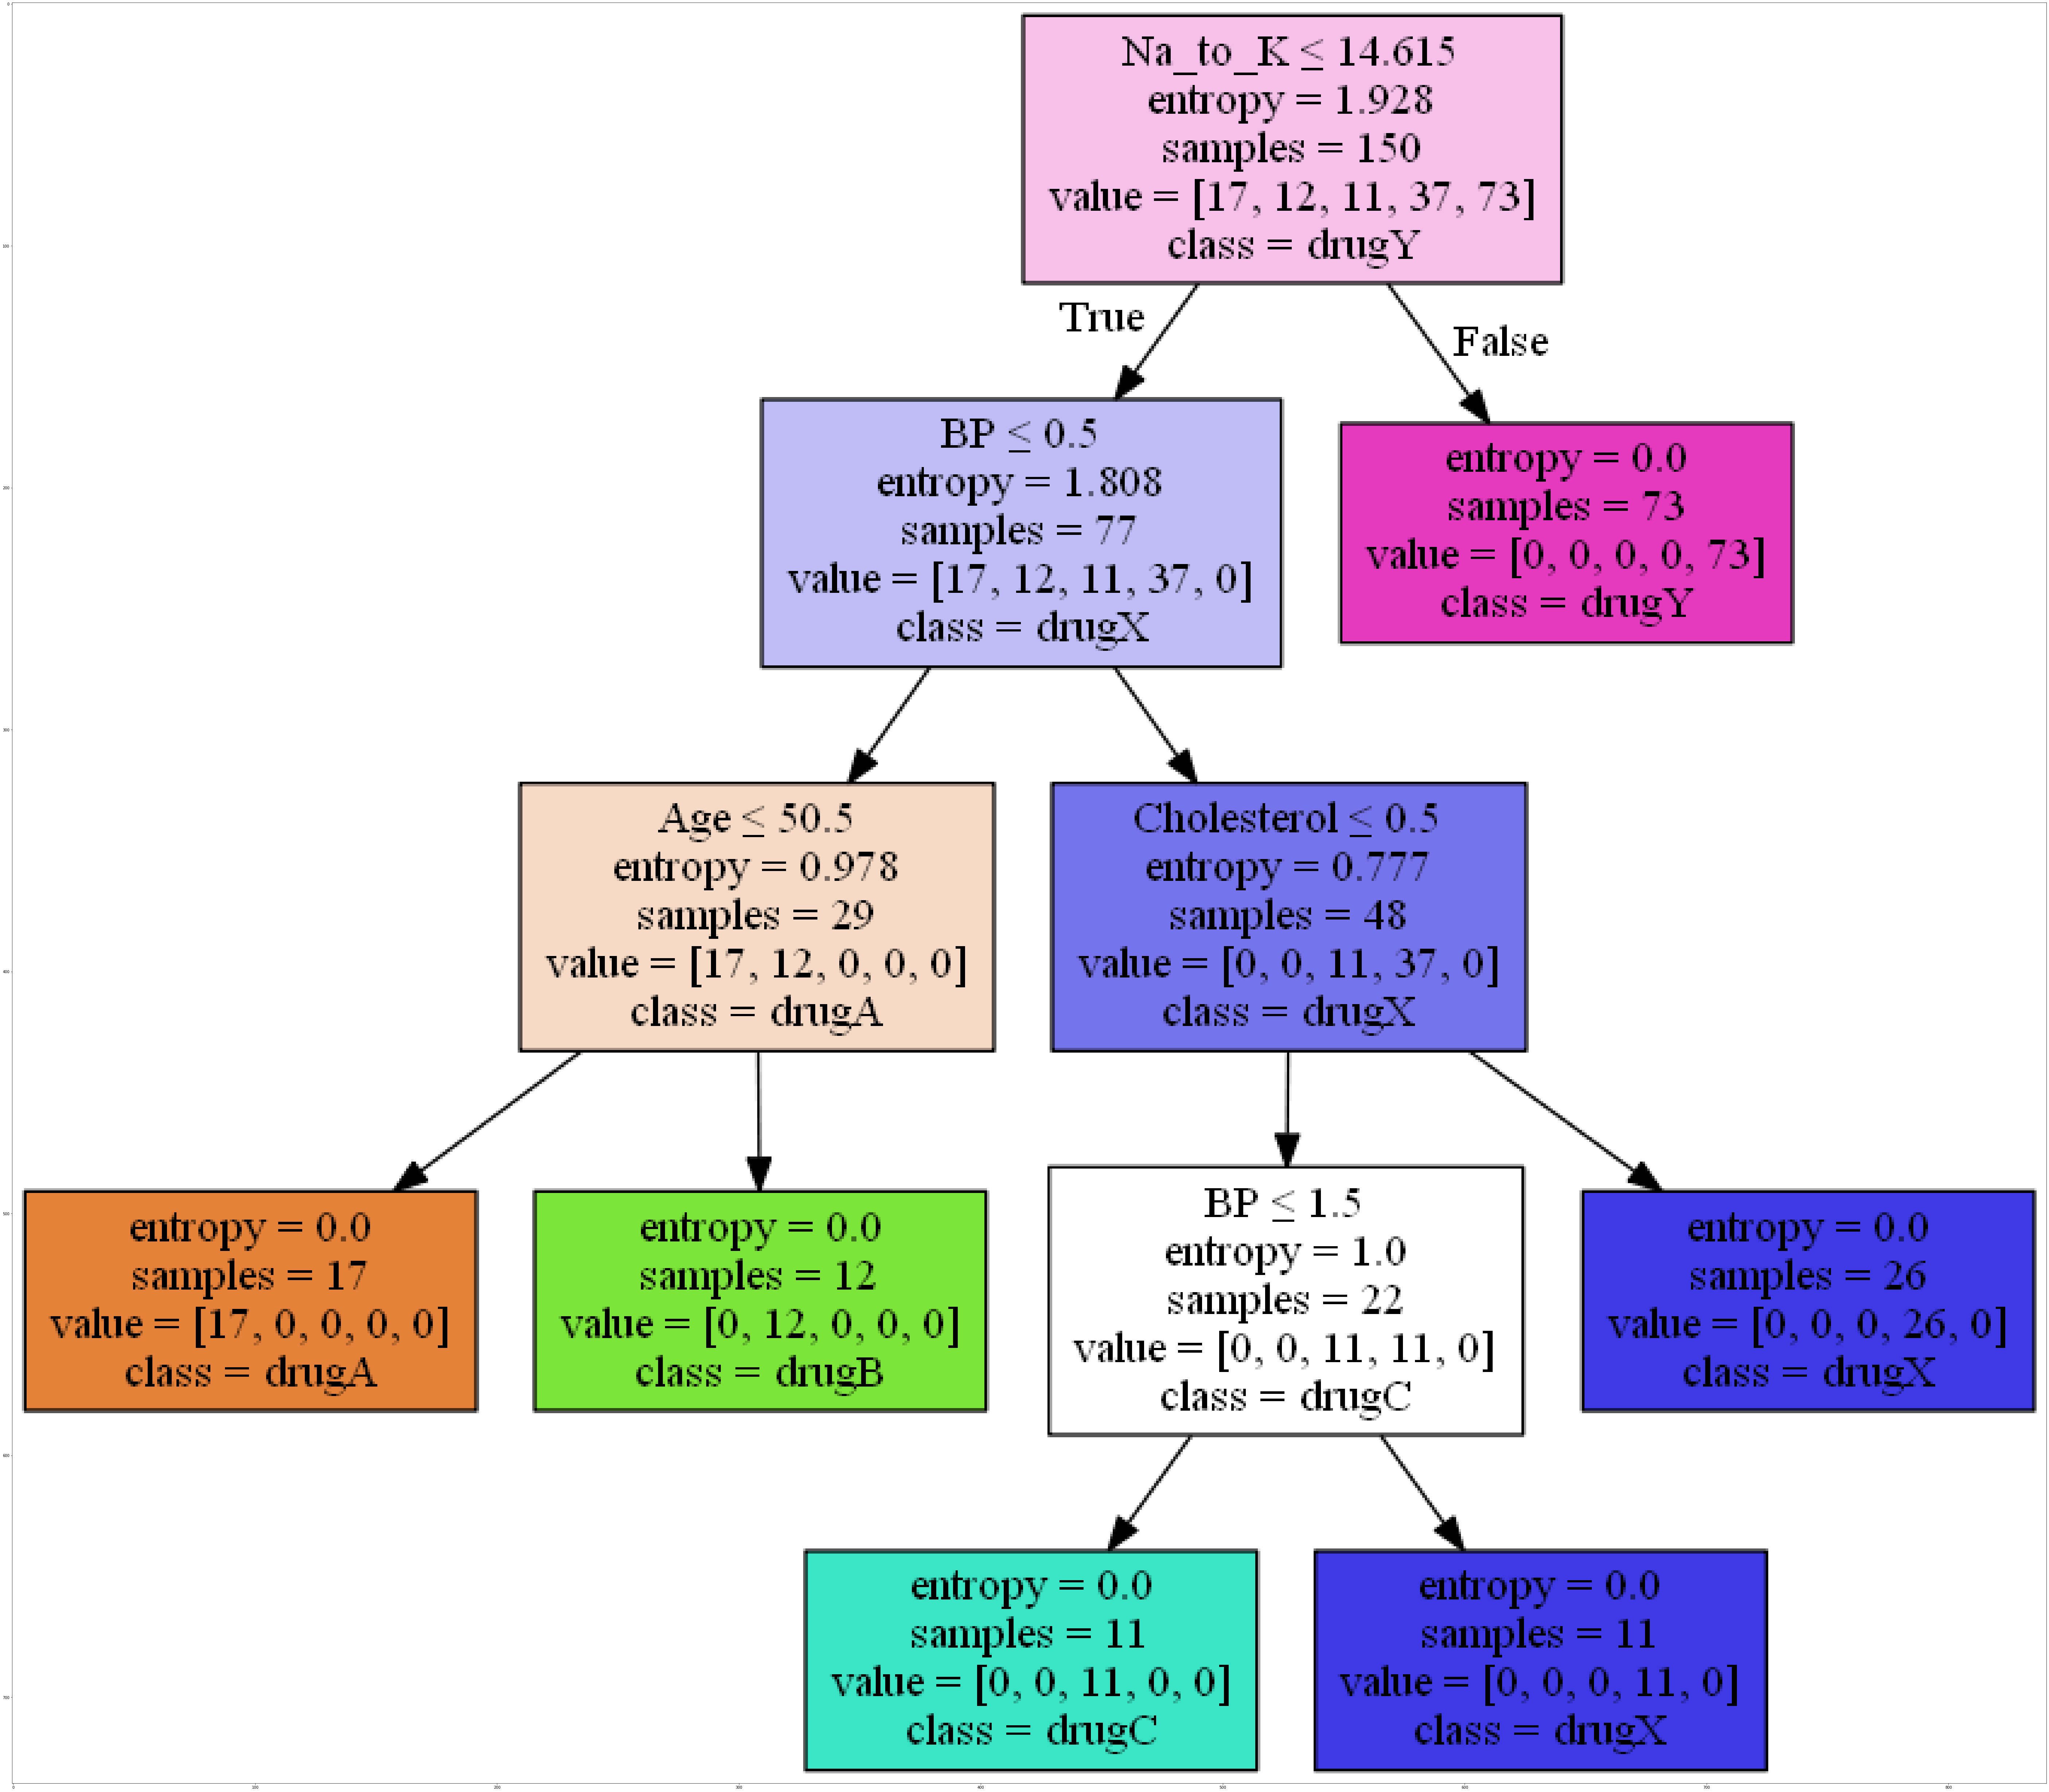

In [17]:
dot_data = StringIO()
filename = "drugtree.png"

featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()

out = tree.export_graphviz(dtc,feature_names=featureNames, out_file=dot_data, 
                           class_names = np.unique(y_train), filled=True,  special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(100, 100))
plt.imshow(img,interpolation='nearest')